In [14]:
import TMQGP as tm
from numpy import *
import QuarkTM
import numpy as np
from tqdm import notebook as tqdm

In [15]:
import matplotlib
matplotlib.style.use('publication23')

In [155]:
erange = linspace(-5, 5, 401)
qrange = linspace(0, 5, 251)

In [156]:
pt = QuarkTM.Particle(0.2, qrange, erange, stat='f')

In [157]:
ch = QuarkTM.Channel(pt, pt, 0.2, G=13, test_potential=0)

In [158]:
ch.populate_T()

  0%|          | 0/401 [00:00<?, ?it/s]

(0.0, 2.0)

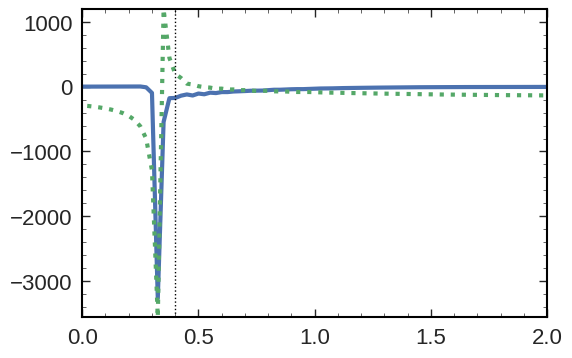

In [159]:
plt.plot(erange, imag(ch.TM[:, 0]))
plt.plot(erange, real(ch.TM[:, 0]), ls=':')
plt.axvline(2*pt.m, lw=1, ls=":", c='black')

# plt.ylim(-150, 150)
plt.xlim(0, 2)

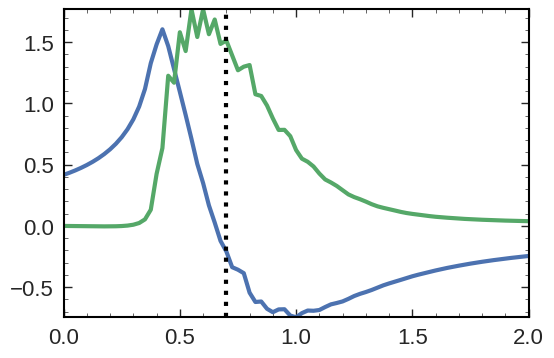

In [160]:
plt.plot(erange, real(ch.X[:, 0]))
plt.plot(erange, imag(ch.X[:, 0]))
plt.xlim(0, 2)

plt.axvline(0.7, c='black', ls=':')

In [161]:
emat = array([erange for q in qrange]).transpose()

In [162]:
def LOG(x):
    res = log(x)
    res[real(x) < 0] += pi*1j
    return res

In [163]:
argmat = 1 - (ch.X)#/ (emat**2 - 0.7**2)

In [173]:
argmat_fake = 1 - (1.5 + 0.01j)/ (emat**2 - 0.35**2)

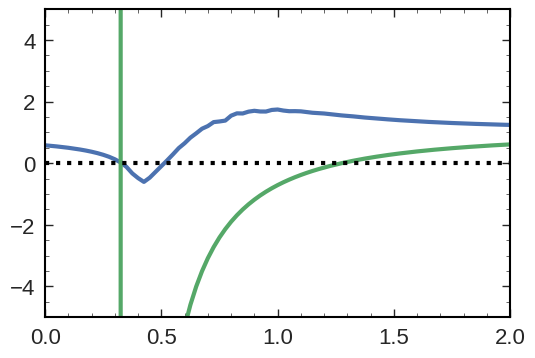

In [174]:
plt.plot(erange, real(argmat[:, 0]))
plt.plot(erange, real(argmat_fake[:, 0]))
plt.xlim(0, 2)
plt.ylim(-5, 5)

plt.axhline(0, ls=':', c='black')

In [175]:
logmat = -imag(log(argmat))
logmat_fake = -imag(log(argmat_fake))
# logmat[logmat < 0] += pi

Another form of the answer

In [176]:
mR = 0.35

In [177]:
arg2 = (emat**2 - mR**2) / (emat**2 - mR**2 - (ch.X))
logmat2 = imag(log(arg2))
# logmat2[logmat2 < 0] += pi


(0.0, 2.0)

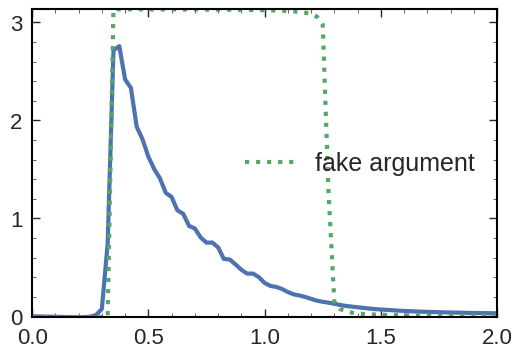

In [178]:
plt.plot(erange, logmat[:, 0])
# plt.plot(erange, logmat2[:, 0], label='argument of ln')
plt.plot(erange, logmat_fake[:, 0], ls=':', label='fake argument')
# plt.plot(erange, real(logmat))

plt.legend()

# plt.ylim(0, 5)

plt.xlim(0, 2)

/tmp/ipykernel_35391/3472479678.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(erange, logmat[:, 0] * (1/(exp(erange/0.2) - 1)), label='actual')
/tmp/ipykernel_35391/3472479678.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(erange, logmat_fake[:, 0] * (1/(exp(erange/0.2) - 1)), ls=':', label='fake')


(0.0, 0.45)

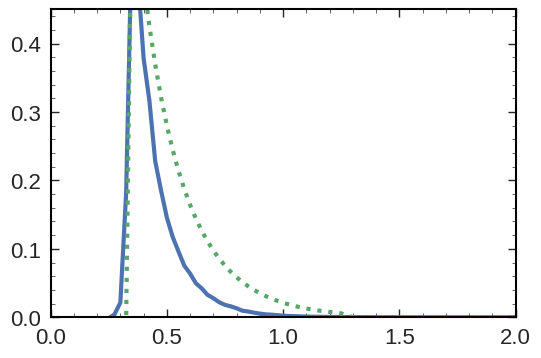

In [183]:
plt.plot(erange, logmat[:, 0] * (1/(exp(erange/0.2) - 1)), label='actual')
plt.plot(erange, logmat_fake[:, 0] * (1/(exp(erange/0.2) - 1)), ls=':', label='fake')

plt.plot()

plt.xlim(0, 2)
plt.ylim(0, 0.45)

(-1.0, 1.0)

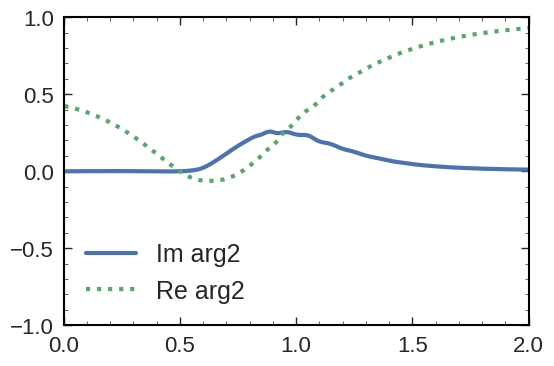

In [96]:
plt.plot(erange, imag(arg2[:, 0]), label='Im arg2')
plt.plot(erange, real(arg2[:, 0]), ls=':', label='Re arg2')
plt.xlim(0, 2)

plt.legend()
plt.ylim(-1, 1)